# Physical Model of Kater's Pendulum

## For Small Angles

### Torque on a Pendulum
    
$\tau=-Mgd\sin(\theta)$
    
Where $M$ is the mass, $\theta$ is the deviation angle from the vertical, $d$ is the distance from the centre of mass to the point about which it is oscillated.
    
The torque is also described by,
    
$\tau=I\alpha$

Where $I$ is the moment of inertia about the point of oscillation and $\alpha$ is the angular acceleration.

### Differential Equation

Angular acceleration is equal to the second derivative of angular position,

$\frac{d^2\theta}{dt^2}+(\frac{Mgd}{I_0})\sin(\theta)=0$

In the small angle approximation,

$\frac{d^2\theta}{dt^2}+(\frac{Mgd}{I_0})\theta=0$

This has the solution,

$\theta=\theta_{max}\sin(\sqrt{\frac{Mgd}{I_0})}t$

The period of the oscillator derived from this equation is,

$T=2\pi\sqrt{\frac{I_0}{Mgd}}$

Comparing this to a simple pendulum where,

$T=2\pi\sqrt{\frac{l}{g}}$

We see that it has the same period as a simple pendulum with length,

$l=\frac{I_0}{Md}$

### Moments of Inertia

From the parallel axis theorem, we know that the moment of inertia of an object about an axis parallel to an axis through its centre of mass is related to the moment of inertia about that centre of mass, $I_c$, by,

$I_0=I_c+MR^2$

Where R is the distance between the two axes. In this case, the axis of $I_0$ and $I_c$.

The moment of inertia about the centre of mass is the sum of the moments of inertia for the rod and disks respectively,

$I_c=\frac{1}{12}M_1(L^2+W^2)+M_1R_1^2+\frac{1}{2}M_2r_1^2+M_2R_2^2+\frac{1}{2}M_3r_2^2+M_3R_3^2$

Where $M_1$ is the mass of the rod, $M_2$ is the mass of the first disk, and $M_3$ is the mass of the second disk. $L$ and $W$ are the length and width of the rod and $r_1$ and $r_2$ are the radii of the two disks. Finally, $R_1$, $R_2$ and $R_3$ are the respective perpendicular distances between their centres of mass and the centre of mass of the combined object.

### Time Period

Substituting the equation for $I_0$ into the equation for the time period,

$T_1=2\pi\sqrt{\frac{I_c+Ml_1^2}{Mgl_1}}$

$T_2=2\pi\sqrt{\frac{I_c+Ml_2^2}{Mgl_2}}$

Where $l_1$ and $l_2$ are the distances between each respective pivot point and the centre of mass.

If the weights on the pendulum are adjusted such that $T_1=T_2$, then,

$(I_c+Ml_1^2)l_2=(I_c+Ml_2^2)l_1$

and

$I_c(l_2-l_1)=Ml_1l_2(l_2-l_1)$

or 

$I_c=Ml_1l_2$

Provided $l_1$ differs significantly from $l_2$, that is, the pendulum is quite asymmetric.

### Finding g

Substituting the equation for $I_c$ for equal time periods into the equation for either $T_1$ or $T_2$ the result is,

$T=2\pi\sqrt{\frac{l_1+l_2}{g}}=2\pi\sqrt{\frac{L}{g}}$

Where L is the distance between the two pivot points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
g = 9.81 # Acceleration due to gravity

L, W = 1.5, 0.04 # Length and width of rod
r_1, r_2 = 0.095, 0.095 # Radii of the cylinders
P_1, P_2 = 0.25, 1.25 # Positions of the knife edges

m_1, x_1 = 2.62, L/2 # Mass of the rod and its centre of mass
m_2, x_2 = 0.68, 0.125 # Mass of the first disk and its centre of mass
m_3, x_3 = 1.5, np.arange(0.25, 1.26, 0.01) # Mass of the second disk and its centres of mass as it is moved

M = m_1 + m_2 + m_3 # Total mass

C_of_M = (m_1 * x_1 + m_2 * x_2 + m_3 * x_3) / M # Array of the centres of mass


l_1, l_2 = C_of_M - P_1, P_2 - C_of_M # Array of the distances between the centres of mass and the knife edges

R_1 = C_of_M - x_1 # Array of the distances between the centres of mass and the centre of mass of the rod
R_2 = C_of_M - x_2 # Array of the distances between the centres of mass and the centre of mass of the first disk
R_3 = C_of_M - x_3 # Array of the distances between the centres of mass and the centre of mass of the second disk

In [3]:
I_c = 1/12 * m_1 * (L**2 + W**2) + m_1 * R_1**2 + 1/2 * m_2 * r_1**2 + m_2 * R_2**2 + 1/2 * m_3 * r_2**2 + m_3 * R_3**2 # Inertia about the centre of mass

T_1 = 2 * np.pi * np.sqrt((I_c + M * l_1**2) / (M * g * l_1)) # Time period for first position
T_2 = 2 * np.pi * np.sqrt((I_c + M * l_2**2) / (M * g * l_2)) # Time period for second position

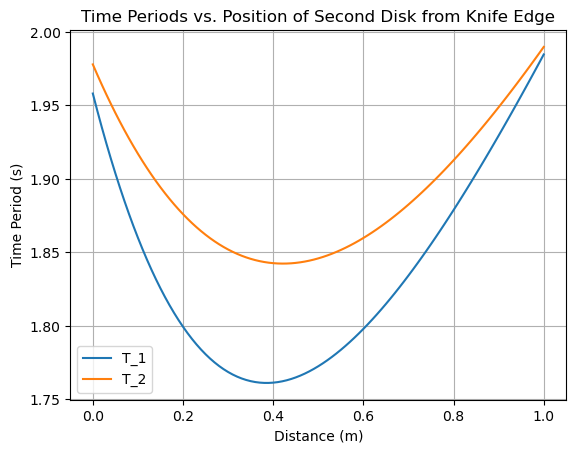

In [4]:
plt.plot(x_3 - P_1, T_1, label="T_1")
plt.plot(P_2 - x_3, T_2, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

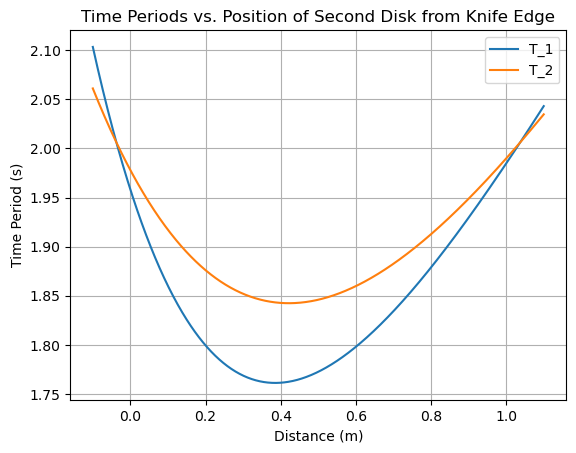

In [5]:
# Create cubic spline interpolation functions for T_1 and T_2
interp_T1 = interp1d(x_3 - P_1, T_1, kind='cubic', fill_value="extrapolate")
interp_T2 = interp1d(P_2 - x_3, T_2, kind='cubic', fill_value="extrapolate")

# Define a new range for the x-axis that extends beyond the current data points by 0.1 in both directions
extended_x = np.linspace(min(x_3 - P_1) - 0.1, max(P_2 - x_3) + 0.1, num=1000)

# Evaluate the interpolation functions at the new x values
extended_T1 = interp_T1(extended_x)
extended_T2 = interp_T2(extended_x)

# Plot the extended curves
plt.plot(extended_x, extended_T1, label="T_1")
plt.plot(extended_x, extended_T2, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

Intersection point 1: x = 1.038, T_1 = 2.006, T_2 = 2.006
Intersection point 2: x = -0.038, T_1 = 2.006, T_2 = 2.006


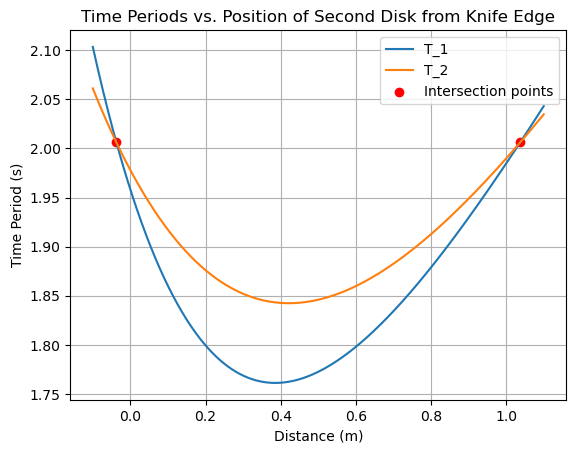

In [6]:
# Find the indices where the difference between the two curves is minimal
sorted_diff_idx = np.argsort(np.abs(extended_T1 - extended_T2))

# Get the first smallest difference index
min_diff_idx1 = sorted_diff_idx[0]

# Find the second smallest difference index with a significant x difference
min_x_diff_threshold = 0.1
min_diff_idx2 = None
for idx in sorted_diff_idx[1:]:
    if np.abs(extended_x[idx] - extended_x[min_diff_idx1]) > min_x_diff_threshold:
        min_diff_idx2 = idx
        break

# Find the corresponding x values (distances) for the two smallest difference indices
x_intersection1 = extended_x[min_diff_idx1]
x_intersection2 = extended_x[min_diff_idx2]

# Print the intersection points (x, T_1, T_2)
print(f"Intersection point 1: x = {x_intersection1:.3f}, T_1 = {extended_T1[min_diff_idx1]:.3f}, T_2 = {extended_T2[min_diff_idx1]:.3f}")
print(f"Intersection point 2: x = {x_intersection2:.3f}, T_1 = {extended_T1[min_diff_idx2]:.3f}, T_2 = {extended_T2[min_diff_idx2]:.3f}")

# Plot the intersection points on the graph
plt.plot(extended_x, extended_T1, label="T_1")
plt.plot(extended_x, extended_T2, label="T_2")
plt.scatter([x_intersection1, x_intersection2], [extended_T1[min_diff_idx1], extended_T1[min_diff_idx2]], color='red', label='Intersection points')
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

### Checking Theory Matches Graph

The time period where the two graphs intersect should satisfy the equation,

$T=2\pi\sqrt{\frac{L}{g}}$

Subbing in the values $L=1$ and $g=9.81$, $T=2.006$.

This values agrees with the ones found computationally to three decimal places showing that the mathetical theory is sound.

## Large Angles

### Energy Derivation

$\frac{1}{2}mv^2=mgh$

The change in velocity for a given change in height can be expressed as

$v=\sqrt{2gh}$

Using the formula for arc length,

$\frac{d\theta}{dt}=\frac{\sqrt{2gh}}{l}$

Where,

$h=l(\cos(\theta)-\cos(\theta_0))$

Therefore

$\frac{d\theta}{dt}=\sqrt{\frac{2g}{l}(\cos(\theta)-\cos(\theta_0))}$

However, from before

$l=\frac{I_0}{Md}$

And so

$\frac{d\theta}{dt}=\sqrt{\frac{2Mgd}{I_0}(\cos(\theta)-\cos(\theta_0))}$

## Time Period

Reciprocal of previous equation

$\frac{dt}{d\theta}=\sqrt{\frac{I_0}{2Mgd}}\frac{1}{\sqrt{\cos(\theta)-\cos(\theta_0)}}$

The time period cycle

$T=t(\theta_0\rightarrow0\rightarrow-\theta_0\rightarrow0\rightarrow\theta_0)$

$\Rightarrow T=4t(\theta_0\rightarrow0)$

This can be represented as an integral

$T=4\sqrt{\frac{I_0}{2Mgd}}\int_{0}^{\theta_0}\frac{d\theta}{\sqrt{cos(\theta)-cos(\theta_0)}}$

This integral diverges as $\theta_0$ approaches the vertical so that a pendulum with just the right energy to go vertical will never actually get there.

This time period can be written in terms of an elliptic integral

$T=4\sqrt{\frac{I_0}{2Mgd}}F(\frac{\pi}{2}, \sin(\frac{\theta_0}{2}))$

Where $F$ is a complete elliptic integral of the first kind defined by

$F(\frac{\pi}{2}, k)=\int_{0}^{\frac{\pi}{2}}\frac{d\theta}{\sqrt{1-k^2sin^2(\theta_0)}}$

Now we can say

$T=4\sqrt{\frac{I_0}{2Mgd}}K(k)$, where $K(k)=F(\frac{\pi}{2}, k)$ and $k=\sin(\frac{\theta_0}{2})$

Substituting the equation for $I_0$ into the equation for the time period,

$T_1=4\sqrt{\frac{I_c+Ml^2_1}{2Mgl_1}}K(k)$

$T_2=4\sqrt{\frac{I_c+Ml^2_2}{2Mgl_2}}K(k)$

Where $l_1$ and $l_2$ are the distances between each respective pivot point and the centre of mass.

If the weights on the pendulum are adjusted such that $T_1=T_2$, by following previous logic for small angles,

$I_c=Ml_1l_2$

and 

$T=4\sqrt{\frac{l_1+l_2}{2g}}K(k)=4\sqrt{\frac{L}{2g}}K(k)$

Where L is the distance between the two pivot points.

## Elliptic Integral

The elliptic integral we are dealing with is a complete elliptic integral of the first kind which can be evaluated in many ways but we'll use the Legendre polynomial solution,

$K(k)=\frac{\pi}{2}\sum_{n=0}^{\infty}(\frac{(2n-1)!!}{(2n)!!}k^n)^2$

Obviously we can't compute it to infinity so we'll choose suitable value for n that gives an appropriate degree of accuracy.

In [7]:
def doublefactorial(n): # Recursive function for double factorial
     if n <= 0:
         return 1
     else:
         return n * doublefactorial(n-2)
    
k = np.sin((3 * np.pi / 20) / 2)

def K(k, n_terms=10): # Function for Legendre polynomial solution
    result = 0
    for n in range(n_terms):
        term = (doublefactorial(2 * n - 1) / doublefactorial(2 * n)) * (k ** n)
        result += term ** 2
    return (np.pi / 2) * result

integral = K(k)

T_1 =  4 * np.sqrt((I_c + M * l_1**2)/(2 * M * g * l_1)) * integral # Time period for first position
T_2 =  4 * np.sqrt((I_c + M * l_2**2)/(2 * M * g * l_2)) * integral # Time period for second position

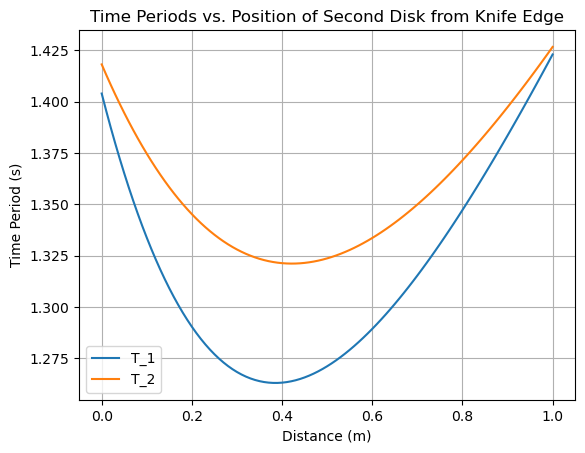

In [8]:
plt.plot(x_3 - P_1, T_1, label="T_1")
plt.plot(P_2 - x_3, T_2, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

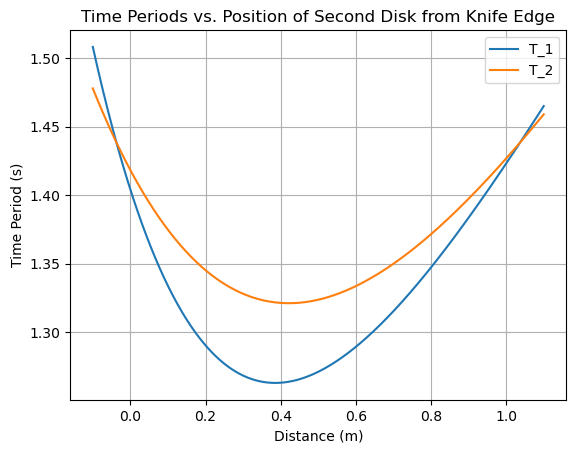

In [9]:
# Create cubic spline interpolation functions for T_1 and T_2
interp_T1 = interp1d(x_3 - P_1, T_1, kind='cubic', fill_value="extrapolate")
interp_T2 = interp1d(P_2 - x_3, T_2, kind='cubic', fill_value="extrapolate")

# Define a new range for the x-axis that extends beyond the current data points by 0.1 in both directions
extended_x = np.linspace(min(x_3 - P_1) - 0.1, max(P_2 - x_3) + 0.1, num=1000)

# Evaluate the interpolation functions at the new x values
extended_T1 = interp_T1(extended_x)
extended_T2 = interp_T2(extended_x)

# Plot the extended curves
plt.plot(extended_x, extended_T1, label="T_1")
plt.plot(extended_x, extended_T2, label="T_2")
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

Intersection point 1: x = 1.038, T_1 = 1.439, T_2 = 1.439
Intersection point 2: x = -0.038, T_1 = 1.439, T_2 = 1.439


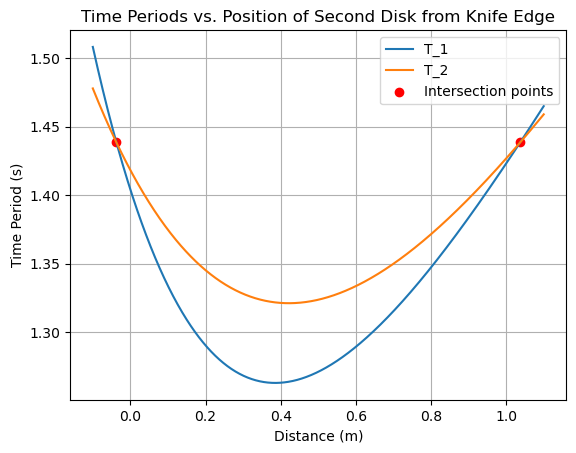

In [10]:
# Find the indices where the difference between the two curves is minimal
sorted_diff_idx = np.argsort(np.abs(extended_T1 - extended_T2))

# Get the first smallest difference index
min_diff_idx1 = sorted_diff_idx[0]

# Find the second smallest difference index with a significant x difference
min_x_diff_threshold = 0.1
min_diff_idx2 = None
for idx in sorted_diff_idx[1:]:
    if np.abs(extended_x[idx] - extended_x[min_diff_idx1]) > min_x_diff_threshold:
        min_diff_idx2 = idx
        break

# Find the corresponding x values (distances) for the two smallest difference indices
x_intersection1 = extended_x[min_diff_idx1]
x_intersection2 = extended_x[min_diff_idx2]

# Print the intersection points (x, T_1, T_2)
print(f"Intersection point 1: x = {x_intersection1:.3f}, T_1 = {extended_T1[min_diff_idx1]:.3f}, T_2 = {extended_T2[min_diff_idx1]:.3f}")
print(f"Intersection point 2: x = {x_intersection2:.3f}, T_1 = {extended_T1[min_diff_idx2]:.3f}, T_2 = {extended_T2[min_diff_idx2]:.3f}")

# Plot the intersection points on the graph
plt.plot(extended_x, extended_T1, label="T_1")
plt.plot(extended_x, extended_T2, label="T_2")
plt.scatter([x_intersection1, x_intersection2], [extended_T1[min_diff_idx1], extended_T1[min_diff_idx2]], color='red', label='Intersection points')
plt.xlabel("Distance (m)")
plt.ylabel("Time Period (s)")
plt.legend()
plt.title("Time Periods vs. Position of Second Disk from Knife Edge")
plt.grid()
plt.show()

In [11]:
T = 4 * np.sqrt((l_1[0] + l_2[0])/(2 * g)) * integral

print(T)

1.4384451296170786


### Checking Theory Matches Graph

The time period where the two graphs intersect should satisfy the equation,

$T=4\sqrt{\frac{L}{2g}}K(k)$

Subbing in the values $L=1$ and $g=9.81$, $T=1.439$.

This values agrees with the ones found computationally to three decimal places showing that the mathetical theory is sound.